In [1]:
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

load_dotenv()

source = os.getenv("FINAL_DATASET_PATH")
separator = os.getenv("FINAL_DATASET_SEPARATOR")
columns_to_keep = os.getenv("COLUMNS_TO_KEEP")

In [2]:
def remove_outliers_iqr(df, column, factor=1.5):
    """
    Rimuove gli outlier da una colonna usando l'IQR.
    
    Args:
    - df (DataFrame): il DataFrame originale.
    - column (str): il nome della colonna su cui applicare il filtro.
    - factor (float): moltiplicatore per definire il range (default 1.5).

    Returns:
    - DataFrame senza outlier per quella colonna.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [3]:
df = pd.read_csv(source, sep=separator)

analysis_df = df.copy()
analysis_df['pubdate'] = pd.to_datetime(analysis_df['pubdate'])

In [4]:
# 🎨 Stile minimale
sns.set_theme(style="whitegrid")

In [5]:
# 👁️‍🗨️ Visualizziamo una sintesi statistica delle metriche numeriche
numeric_cols = [
    'views', 'post_views_count', 
    'average engagement time per active user',
    'active users', 'views per active user'
]

analysis_df[numeric_cols].describe()

,views,post_views_count,average engagement time per active user,active users,views per active user
count,6299.000000,6972.000000,6299.000000,6299.000000,6299.000000
mean,47.498492,871.341509,31.422989,38.069217,1.272519
std,150.546126,1238.407126,37.898254,130.766376,0.238645
min,1.000000,21.000000,0.000000,1.000000,0.857143
25%,15.000000,288.000000,15.660920,13.000000,1.111111
50%,25.000000,442.500000,25.727273,20.000000,1.222222
75%,43.000000,839.250000,40.127717,32.000000,1.375000
max,5434.000000,19370.000000,2001.250000,4747.000000,4.100000


### 📅 1. Distribuzione articoli nel tempo

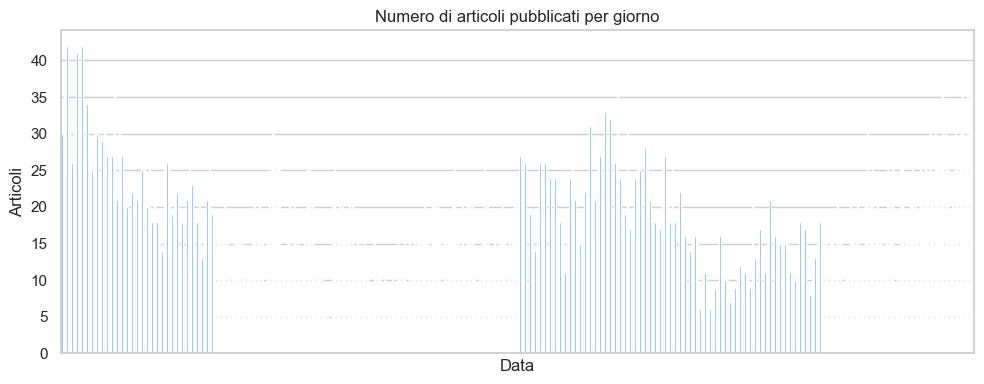

In [6]:
daily_counts = analysis_df.groupby(analysis_df['pubdate'].dt.date).size()
plt.figure(figsize=(10, 4))
daily_counts.plot(kind='bar', color='#5DADE2')
plt.title("Numero di articoli pubblicati per giorno")
plt.xlabel("Data")
plt.ylabel("Articoli")
plt.xticks([])
plt.tight_layout()
plt.show()

In [7]:
# Analisi delle stagionalità

### 🔥 2. Top 10 articoli per views GA4

C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_20108\558574281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


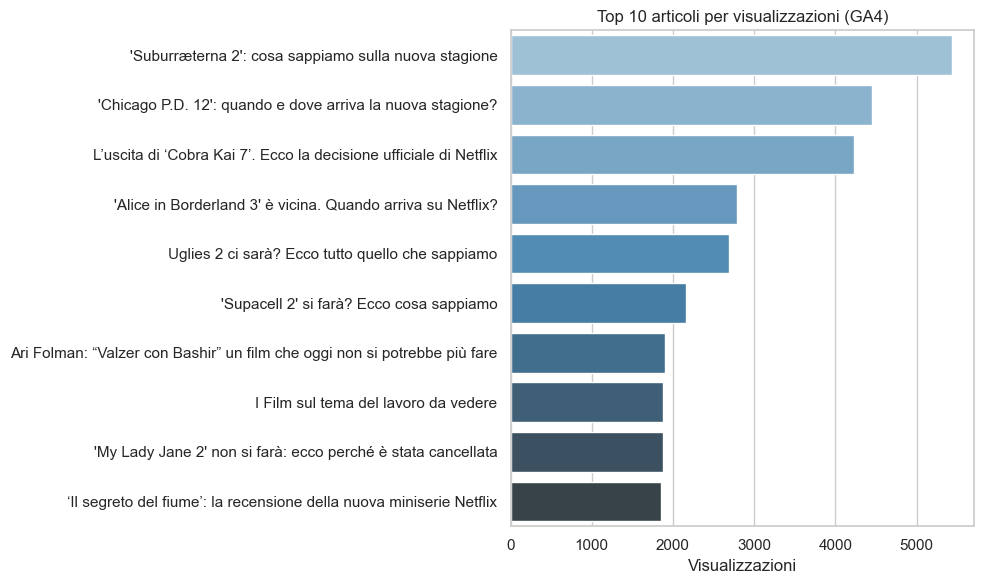

In [8]:
top_views = analysis_df.sort_values(by='views', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_views,
    y='title',
    x='views',
    palette='Blues_d'
)
plt.title("Top 10 articoli per visualizzazioni (GA4)")
plt.xlabel("Visualizzazioni")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
// In cell with id: ebea4b28
// "source": [
// ... existing json ...
                "import os",
                "import sys",
                "import pandas as pd",
                "import matplotlib.pyplot as plt",
                "import seaborn as sns"
// ... existing json ...
// ]

### 🧠 3. Engagement medio per categoria

 La categoria "News" ha un volume di visualizzazioni molto alto (colore giallo), ma un tempo di engagement medio basso. Strategia:

Ottimizzazione per la Fruizione Veloce: Gli utenti probabilmente consumano le news rapidamente. Assicuratevi che i titoli siano chiari e accattivanti, i contenuti facilmente scansionabili e che le informazioni chiave siano subito evidenti.
Esplorare Formati Più Coinvolgenti: Considerate l'introduzione di formati di news più interattivi o multimediali (brevi video esplicativi, infografiche) per aumentare il tempo di permanenza.


Le categorie "Altro", "Trailers", "Trailers / In Sala" e "Guide e Film da Vedere" mostrano sia un basso tempo di engagement che un basso volume di visualizzazioni. Strategia:

Rivalutare la Pertinenza: Chiedetevi se queste categorie sono ancora rilevanti per la vostra strategia editoriale e per il vostro pubblico.
Esplorare Nuovi Approcci: Se ritenete che queste categorie abbiano ancora un senso, sperimentate nuovi formati o modi di presentarle per cercare di aumentare l'interesse. In alternativa, potreste considerare di ridurne la frequenza o di integrarle in altre categorie più performanti.

Capitalizzare su Serie TV e Recensioni: Queste categorie mostrano un engagement e un volume di visualizzazioni discreti. Strategia: Continuate a investire in questi formati. Analizzate quali serie TV e recensioni hanno avuto più successo e cercate di replicare quel successo. Considerate la possibilità di creare contenuti correlati (dietro le quinte, analisi degli episodi, ecc.) per aumentare ulteriormente l'engagement.

### 👥 4. Views per Active User

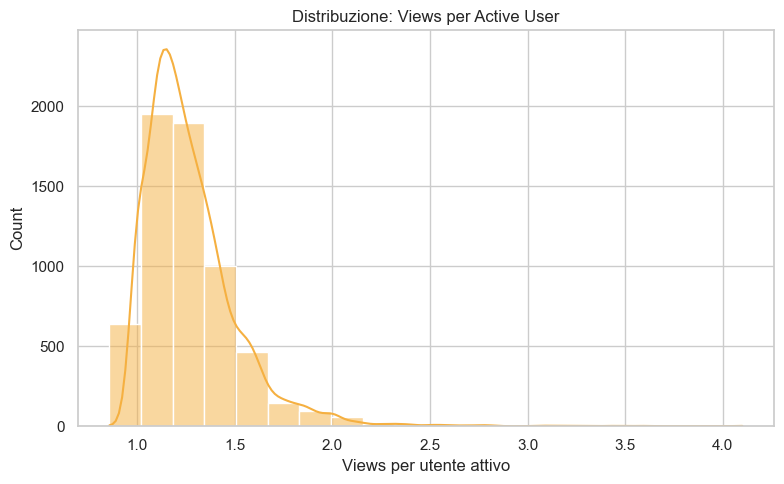

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(analysis_df['views per active user'], bins=20, kde=True, color="#F5B041")
plt.title("Distribuzione: Views per Active User")
plt.xlabel("Views per utente attivo")
plt.tight_layout()
plt.show()


Abbiamo visto come i nostri utenti attivi visualizzano i contenuti. La maggior parte di loro guarda pochi contenuti. Però, c'è un gruppo più piccolo di utenti che ne guarda molti di più.

**Cosa ci dice questo?**

* **Nuovi Utenti?** Forse tanti utenti sono nuovi e stanno ancora scoprendo cosa gli piace. Dovremmo capire come aiutarli a trovare più contenuti interessanti.
* **Fan Fedeli?** Chi guarda tanti contenuti sono probabilmente i nostri fan più affezionati. Capire cosa gli piace tanto potrebbe aiutarci a creare più contenuti simili per tutti.
* **Contenuti Top?** Quali contenuti vengono visti di più? Analizzarli potrebbe darci idee su cosa funziona meglio e cosa creare in futuro.

**Prossimi Passi:**

Cerchiamo di capire meglio chi sono questi utenti "leggeri" e "forti" e cosa possiamo fare per coinvolgerli ancora di più con i nostri contenuti.

### Un Dettaglio Interessante nel Grafico delle Visualizzazioni

Avete notato quella leggera "rientranza" nel grafico, intorno al numero di visualizzazioni 1.6-1.8? Potrebbe significare che **non tutti i nostri utenti attivi si comportano allo stesso modo.**

**Immaginate che ci siano due gruppi principali di utenti:**

* **Un gruppo più grande** che tende a visualizzare un certo numero di contenuti (diciamo, pochi).
* **Un altro gruppo, più piccolo,** che invece ne visualizza un po' di più.

Quella "rientranza" nel grafico potrebbe essere il punto dove questi due gruppi si "incontrano".

**Cosa significa per noi?**

* Potremmo avere **due tipi principali di pubblico attivo** con abitudini leggermente diverse.
* Capire meglio questi due gruppi potrebbe aiutarci a **creare contenuti più adatti a ciascuno di loro.**
* Potremmo anche pensare a come **coinvolgere di più il gruppo che visualizza meno contenuti.**

In sostanza, quel piccolo dettaglio nel grafico potrebbe nascondere informazioni importanti su come i nostri utenti interagiscono con i nostri contenuti e darci nuove idee per migliorare la nostra offerta editoriale.

### Prossimo Passo: Creare Gruppi di Utenti Simili

Possiamo usare una tecnica statistica per raggruppare automaticamente gli utenti in base a come visualizzano i contenuti. L'obiettivo è trovare diversi "tipi" di utenti (ad esempio, chi guarda pochi contenuti e chi ne guarda molti).  
Per farlo, scegliamo quanti gruppi vogliamo trovare, facciamo fare il lavoro al computer e poi analizziamo le caratteristiche di ogni gruppo per capire meglio il nostro pubblico e creare contenuti più adatti.

In [10]:
analysis_df

,title,link,category,pagepath,pubdate,post_views_count,views,publication_tags,average engagement time per active user,active users,views per active user
0,"Cattivissimo me di Pierre Coffin, Chris Renaud...",https://www.taxidrivers.it/67349/film-da-veder...,Guide e Film da Vedere,/67349/film-da-vedere/cattivissimo-me-di-pierr...,2024-04-09 05:00:09+00:00,2635,10.0,"Cattivissimo me, Chris Renaud, Dana Gaier, Els...",10.666667,6.0,1.666667
1,Pusher di Nicolas Winding Refn,https://www.taxidrivers.it/77452/film-da-veder...,Guide e Film da Vedere,/77452/film-da-vedere/stasera-alle-2335-rai-mo...,2024-04-09 05:00:24+00:00,2958,15.0,"Kim Bodnia, Laura Drasbæk, Mads Mikkelsen, Nic...",13.200000,15.0,1.000000
2,Missing - Scomparso,https://www.taxidrivers.it/80104/film-da-veder...,Guide e Film da Vedere,/80104/film-da-vedere/stasera-alle-2330-la7-mi...,2024-04-09 05:00:57+00:00,4170,13.0,"Costa-Gavras, Jack Lemmon, Melanie Mayron, Mis...",12.555556,9.0,1.444444
3,I migliori podcast italiani sul cinema che non...,https://www.taxidrivers.it/359630/magazine-2/i...,Speciali e Magazine,/359630/magazine-2/i-migliori-podcast-italiani...,2024-04-09 07:01:36+00:00,2389,588.0,"Cinema, Enrico Magrelli, Hollywood Party, PANO...",49.848411,409.0,1.437653
4,'Another End' Conversazione con Piero Messina,https://www.taxidrivers.it/362834/interviews/c...,Interviste,/362834/interviews/conversation/another-end-co...,2024-04-09 06:15:04+00:00,594,64.0,"Another End, Carlo Cerofolini, CONVERSATIONS, ...",20.675676,37.0,1.729730
...,...,...,...,...,...,...,...,...,...,...,...
6967,"L'invenzione del ""cutoff"" spiegata da Artisti ...",https://www.taxidrivers.it/436725/latest-news/...,News,/436725/latest-news/l-invenzione-del-cutoff-sp...,2025-04-08 21:28:08+00:00,82,7.0,"Alberto Molinari, Alessandro Riceci, Artisti 7...",41.000000,5.0,1.400000
6968,Il ritorno trionfale di Tom Cruise a Cannes co...,https://www.taxidrivers.it/436726/latest-news/...,News,/436726/latest-news/il-ritorno-trionfale-di-to...,2025-04-08 20:54:32+00:00,87,4.0,"Festival di Cannes, Mission Impossible – The F...",9.750000,4.0,1.000000
6969,'Come vendere droga online (in fretta)': dispo...,https://www.taxidrivers.it/436743/trailers/com...,Trailers,/436743/trailers/come-vendere-droga-online-in-...,2025-04-08 22:50:02+00:00,234,NaN,"Come vendere droga online (in fretta), lena kl...",NaN,NaN,NaN
6970,"Da Gabriella Carlucci ai Manetti Bros, i due g...",https://www.taxidrivers.it/436750/festival-di-...,Festival di Cinema,/436750/festival-di-cinema/eventi/da-gabriella...,2025-04-08 23:57:27+00:00,173,18.0,"Epica Etica Estetica dell’Immaginario, Gabriel...",28.666667,15.0,1.200000


## 👨‍👨‍👧‍👦Clustering

Dall'analisi delle visualizzazioni, abbiamo visto che gli utenti attivi non si comportano tutti allo stesso modo. Per capire meglio le loro diverse esigenze e preferenze, possiamo utilizzare la **cluster analysis**.

**Cos'è in Pratica?**

Immaginate di creare dei "gruppi" di utenti in base a come navigano e quali contenuti guardano. Ad esempio, potremmo trovare un gruppo che legge soprattutto notizie brevi, un altro interessato a reportage lunghi e un terzo che preferisce i video.

**Perché è Importante per Noi?**

* **Identificare i diversi tipi di lettori:** Riconoscere i gruppi con abitudini simili ci aiuta a capire meglio il nostro pubblico.
* **Personalizzare i contenuti:** Potremmo adattare meglio ciò che offriamo a ciascun gruppo, aumentando il loro coinvolgimento.
* **Scoprire nuove opportunità:** Potremmo identificare segmenti di pubblico che non stiamo ancora raggiungendo nel modo giusto.

**Domande a Cui Potremmo Rispondere:**

* Esistono gruppi di utenti con preferenze di contenuto ben definite?
* Quali sono le caratteristiche principali di questi gruppi?
* Possiamo offrire contenuti o suggerimenti più mirati a ciascun gruppo?
* Ci sono argomenti o formati che interessano specificamente un gruppo e che potremmo sviluppare di più?

In sintesi, la cluster analysis ci permette di passare da una visione generale a una più dettagliata dei nostri utenti, aprendo la strada a strategie editoriali più efficaci e personalizzate.

## Analisi dei flop

### Dal 9 Aprile 2024

### 📊 Metrica di Normalizzazione: Views e Utenti Attivi per Giorno -> e perché è sbagliata
Calcolare la media di visualizzazioni o utenti attivi per giorno (views / giorni_trascorsi) presuppone implicitamente che le visualizzazioni di un articolo si distribuiscano in modo lineare e costante nel tempo — ma nella realtà questo è raramente vero.

Gli articoli, specialmente nel contesto "news", seguono dinamiche di traffico fortemente decrescenti:
👉 la maggior parte delle views si concentra nelle prime 24-48 ore dalla pubblicazione, per poi calare drasticamente.

Quindi dividere semplicemente il numero di visualizzazioni per i giorni trascorsi penalizza gli articoli vecchi, che non ricevono quasi più traffico, e gonfia i numeri degli articoli nuovi (che hanno avuto meno tempo ma potrebbero avere avuto un picco iniziale).
Questo porta a classifiche distorte e poco affidabili.

✅ Perché è preferibile confrontarsi con un benchmark temporale
Una metrica più corretta è confrontare le performance di ogni articolo con un benchmark costruito sugli articoli pubblicati nello stesso giorno.

Questo approccio:

tiene conto del contesto editoriale e del calendario (es: weekend vs giorni feriali),

si adatta alle oscillazioni naturali del traffico del sito (festivi, breaking news, eventi esterni),

riflette il ciclo di vita naturale degli articoli, senza penalizzare o premiare la loro "età".

Esempio:
Se un articolo pubblicato ieri ha fatto 300 visualizzazioni, ma la media di tutti gli articoli pubblicati ieri è 1000, allora è sotto-performante, anche se è "giovane".
Allo stesso modo, un articolo pubblicato 10 giorni fa che ha raggiunto la media del proprio giorno di pubblicazione, ha fatto il "minimo sindacale" e può essere considerato nella norma.

In [11]:
import pandas as pd
from datetime import datetime, timedelta

# Conversione data
analysis_df['pubdate'] = pd.to_datetime(analysis_df['pubdate'])

# Filtra articoli pubblicati negli ultimi 30 giorni
ultimo_mese = datetime.now() - timedelta(days=30)
recent_articles = analysis_df[analysis_df['pubdate'].dt.tz_localize(None) >= ultimo_mese].copy()

# Calcola giorni trascorsi dalla pubblicazione
recent_articles['days_since_pub'] = (datetime.now() - recent_articles['pubdate'].dt.tz_localize(None)).dt.days
recent_articles['days_since_pub'] = recent_articles['days_since_pub'].replace(0, 1)  # evitare divisione per zero

# Crea metriche normalizzate
recent_articles['views_per_day'] = recent_articles['views'] / recent_articles['days_since_pub']
recent_articles['active_users_per_day'] = recent_articles['active users'] / recent_articles['days_since_pub']

# Ordina per Views per giorno crescenti
flop_recent = recent_articles.sort_values(by=['views_per_day', 'active_users_per_day']).head(20)

# Stampa classifica flop
print("📉 I 20 articoli peggiori (Views per giorno e Utenti Attivi per giorno) - pubblicati nell'ultimo mese:\n")
for index, row in flop_recent.iterrows():
    print(f"📌 Titolo: {row['title']}")
    print(f"🗓️ Pubblicato il: {row['pubdate'].strftime('%Y-%m-%d %H:%M')} ({row['days_since_pub']} giorni fa)")
    print(f"🔗 Link: {row['link']}")
    print(f"👁️ Views Totali: {row['views']} | 📊 Views/giorno: {row['views_per_day']:.2f}")
    print(f"👥 Utenti Attivi Totali: {row['active users']} | 👥 Attivi/giorno: {row['active_users_per_day']:.2f}\n")


📉 I 20 articoli peggiori (Views per giorno e Utenti Attivi per giorno) - pubblicati nell'ultimo mese:

📌 Titolo: 'L'Eternauta': ecco il trailer della serie post-apocalittica targata Netflix
🗓️ Pubblicato il: 2025-04-01 20:15 (21 giorni fa)
🔗 Link: https://www.taxidrivers.it/434854/trailers/leternauta-ecco-il-trailer-della-serie-post-apocalittica-targata-netflix.html
👁️ Views Totali: 1.0 | 📊 Views/giorno: 0.05
👥 Utenti Attivi Totali: 1.0 | 👥 Attivi/giorno: 0.05

📌 Titolo: 'Projekt UFO': ecco il trailer della miniserie Netflix
🗓️ Pubblicato il: 2025-04-03 15:03 (20 giorni fa)
🔗 Link: https://www.taxidrivers.it/435326/trailers/projekt-ufo-ecco-il-trailer-della-miniserie-netflix.html
👁️ Views Totali: 1.0 | 📊 Views/giorno: 0.05
👥 Utenti Attivi Totali: 1.0 | 👥 Attivi/giorno: 0.05

📌 Titolo: “April”, il trailer del dramma georgiano
🗓️ Pubblicato il: 2025-03-28 13:06 (26 giorni fa)
🔗 Link: https://www.taxidrivers.it/433890/latest-news/anticipazioni/april-il-trailer-del-dramma-georgiano.html
👁️

C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_20108\557882583.py:102: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_20108\557882583.py:102: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_20108\557882583.py:102: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\manuel.deluzi\OneDrive - Havas\Projects\personali\taxi_drivers\.td_ds_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\manuel.deluzi\OneDrive - Havas\Projects\personali\taxi_drivers\.td_ds_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu 

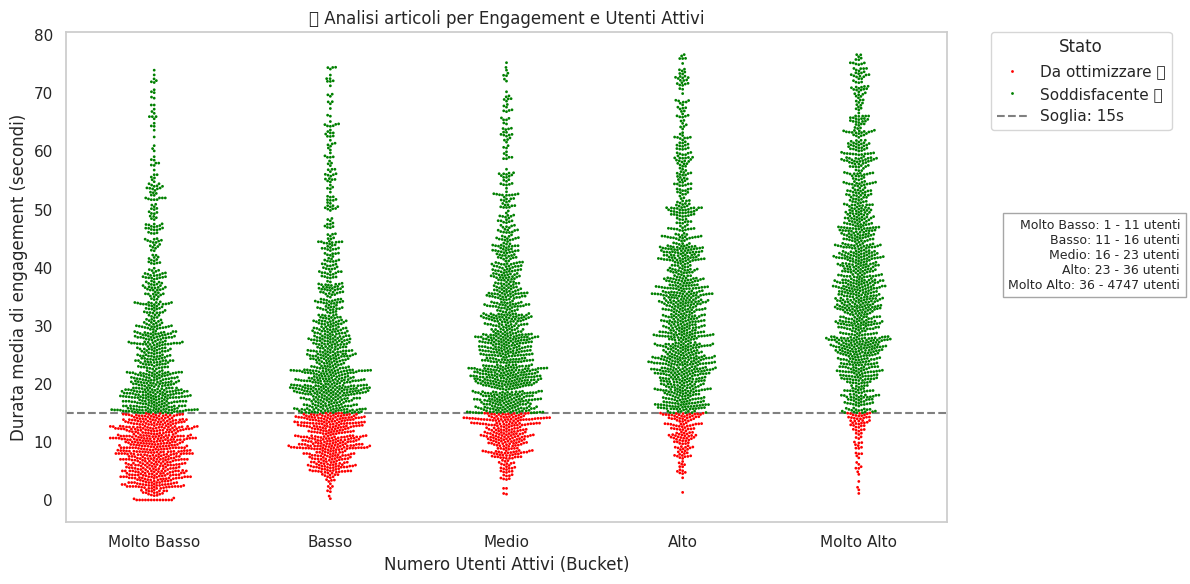

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def plot_engagement_clusters(df, n_buckets=5, engagement_threshold=10, bucket_labels=None, plot_type='scatter'):
    """
    Visualizza un grafico a grappoli o swarm per identificare articoli con engagement insoddisfacente.

    Args:
    - df (DataFrame): il DataFrame da analizzare.
    - n_buckets (int): numero di bucket per la variabile 'active users'.
    - engagement_threshold (float): soglia sotto la quale evidenziare i contenuti da ottimizzare.
    - bucket_labels (list of str): etichette personalizzate per i bucket.
    - plot_type (str): 'scatter' per scatterplot, 'swarm' per swarmplot.
    """

    data = df.copy()
    data = remove_outliers_iqr(data, 'average engagement time per active user')

    # Calcolo dei bucket con soglie reali
    quantiles = pd.qcut(
        data['active users'],
        q=n_buckets,
        retbins=True,
        duplicates='drop'
    )[1]

    if bucket_labels and len(bucket_labels) == len(quantiles) - 1:
        data['active_users_bucket'] = pd.cut(
            data['active users'],
            bins=quantiles,
            labels=bucket_labels,
            include_lowest=True
        )
    else:
        data['active_users_bucket'] = pd.cut(
            data['active users'],
            bins=quantiles,
            include_lowest=True
        )

    data['target_flag'] = np.where(
        data['average engagement time per active user'] < engagement_threshold,
        'Da ottimizzare 🔴',
        'Soddisfacente 🟢'
    )

    plt.figure(figsize=(12, 6))

    plt.rcParams['font.family'] = 'DejaVu Sans'

    if plot_type == 'scatter':
        sns.scatterplot(
            data=data,
            x='active_users_bucket',
            y='average engagement time per active user',
            hue='target_flag',
            palette={'Da ottimizzare 🔴': 'red', 'Soddisfacente 🟢': 'green'},
            alpha=0.7,
            s=100
        )
    elif plot_type == 'swarm':
        sns.swarmplot(
            data=data,
            x='active_users_bucket',
            y='average engagement time per active user',
            hue='target_flag',
            palette={'Da ottimizzare 🔴': 'red', 'Soddisfacente 🟢': 'green'},
            dodge=False,
            size=2
        )
    else:
        raise ValueError("plot_type deve essere 'scatter' o 'swarm'.")

    plt.title('🎯 Analisi articoli per Engagement e Utenti Attivi') 
    plt.xlabel('Numero Utenti Attivi (Bucket)')
    plt.ylabel('Durata media di engagement (secondi)')
    plt.axhline(engagement_threshold, color='gray', linestyle='--', label=f'Soglia: {engagement_threshold}s')

    # Aggiunta leggendina con soglie
    legend_text = "\n".join([
        f"{bucket_labels[i] if bucket_labels else f'Bucket {i+1}'}: {int(quantiles[i])} - {int(quantiles[i+1])} utenti"
        for i in range(len(quantiles)-1)
    ])
    plt.gcf().text(0.99, 0.5, legend_text,
                   fontsize=9,
                   ha='right',
                   va='bottom',
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
    

    plt.legend(
        title='Stato',
        bbox_to_anchor=(1.05, 1),  # Move it outside
        loc='upper left',
        borderaxespad=0.
    )
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Esempio di esecuzione:
bucket_labels = ['Molto Basso', 'Basso', 'Medio', 'Alto', 'Molto Alto']
plot_engagement_clusters(
    analysis_df,
    n_buckets=5,
    engagement_threshold=15, # Readership threshold
    bucket_labels=bucket_labels,
    plot_type='swarm'  # oppure 'scatter'
)


## Perché Analizzare Diverse Soglie di Engagement?

La soglia di engagement che usiamo definisce cosa consideriamo un articolo "di successo" nel trattenere l'utente. Cambiando questa soglia, cambiamo l'aspettativa su quanto tempo l'utente dovrebbe dedicare al contenuto. Analizzare come gli articoli performano rispetto a diverse soglie ci aiuta a capire meglio i vari comportamenti dei lettori (lettura veloce vs. approfondita) e a definire obiettivi di engagement più realistici e strategici per i nostri contenuti.

Visti i risultati precedenti, una delle categorie su cui concentrarsi sono le notizie ("News"). Queste rappresentano la categoria più voluminosa dell'intera linea editoriale ma molte notizie, come abbiamo visto, presentano un engagement medio basso.

Soglie da esplorare per questa tipologia di articoli potrebbero essere **molto basse**, come:

* **3-5 secondi:** per capire se l'utente ha almeno letto il titolo e l'occhiello.
* **8-10 secondi:** per valutare se ha letto l'introduzione o i punti chiave iniziali.
* **15-20 secondi:** per capire se ha scorso l'articolo o letto qualche dettaglio in più.

Analizzare le performance rispetto a queste soglie ci dirà quanti dei nostri articoli di news riescono a superare i vari stadi di attenzione minima dell'utente.

Ma concentriamoci prima sulle news con ingaggio molto basso e pochi utenti attivi, dai quali conviene dirottare risorse altrove. Questi articoli non solo non riescono a coinvolgere (sotto anche una soglia minima), ma non raggiungono neanche un vasto pubblico, indicando una doppia inefficacia che suggerisce di investire tempo e risorse editoriali in aree più promettenti.

[Chartbeat](https://blog.chartbeat.com/2017/11/17/enhanced-art-writing-headlines/) definisce di qualità un click i cui visitatori spendono **almeno 15 secondi** sulla pagina di destinazione.


Altri articoli interessanti al riguardo:
* [The 6-15-7 Rule Behind Sticky Blog Posts](https://medium.com/better-marketing/the-6-15-7-rule-behind-sticky-blog-posts-c96f422529fa#:~:text=a%20specific%20person.-,15%20Seconds,walking%20right%20back%20out%20again.)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_business_swarm(df, x_col, y_col, n_buckets=5, threshold=None, 
                        bucket_labels=None, category_col=None, target_category=None,
                        xlabel='Bucket', ylabel='Value', title='Business Swarmplot',
                        legend_labels=('Needs Optimization', 'Satisfactory')):
    """
    Generates a Swarmplot for business metric analysis with data preprocessing.

    This function filters, cleans, buckets, and visualizes metric distributions 
    in a clear and business-friendly Swarmplot — optionally filtering by category.

    :param df: pandas DataFrame containing your data.
    :type df: pd.DataFrame
    :param x_col: Column name to create quantile-based buckets for the X-axis (e.g., 'active users').
    :type x_col: str
    :param y_col: Column name for the Y-axis metric to analyze (e.g., 'average engagement time').
    :type y_col: str
    :param n_buckets: Number of quantile-based buckets to divide the X variable into.
    :type n_buckets: int, optional
    :param threshold: Threshold value for flagging entries based on the Y metric.
    :type threshold: float, optional
    :param bucket_labels: Custom labels for the X-axis buckets. Length must match the number of bins.
    :type bucket_labels: list, optional
    :param category_col: Column name for filtering by category (if applicable).
    :type category_col: str, optional
    :param target_category: Specific category to filter, if `category_col` is provided.
    :type target_category: str, optional
    :param xlabel: Label for the X-axis.
    :type xlabel: str, optional
    :param ylabel: Label for the Y-axis.
    :type ylabel: str, optional
    :param title: Plot title.
    :type title: str, optional
    :param legend_labels: Tuple of labels for values below and above the threshold.
    :type legend_labels: tuple, optional

    :return: Displays a Seaborn Swarmplot with clear business labels and threshold markers.
    :rtype: None
    """
    data = df.copy()

    if category_col and target_category:
        data = data[data[category_col] == target_category].copy()

    data = remove_outliers_iqr(data, y_col)

    quantiles = pd.qcut(
        data[x_col],
        q=n_buckets,
        retbins=True,
        duplicates='drop'
    )[1]

    if bucket_labels and len(bucket_labels) == len(quantiles) - 1:
        data['x_bucket'] = pd.cut(data[x_col], bins=quantiles, labels=bucket_labels, include_lowest=True)
    else:
        data['x_bucket'] = pd.cut(data[x_col], bins=quantiles, include_lowest=True)

    if threshold is not None:
        data['target_flag'] = np.where(
            data[y_col] < threshold,
            legend_labels[0],
            legend_labels[1]
        )

    plt.figure(figsize=(10, 6))
    sns.swarmplot(
        data=data,
        x='x_bucket',
        y=y_col,
        hue='target_flag' if threshold is not None else None,
        palette={legend_labels[0]: 'red', legend_labels[1]: 'green'} if threshold is not None else None,
        size=7,
        alpha=0.8
    )

    if threshold is not None:
        plt.axhline(threshold, color='gray', linestyle='--', label=f'Threshold: {threshold}')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if threshold is not None:
        plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

    legend_text = "\n".join([
        f"{bucket_labels[i] if bucket_labels else f'Bucket {i+1}'}: {int(quantiles[i])} - {int(quantiles[i+1])}"
        for i in range(len(quantiles)-1)
    ])

    plt.gcf().text(
        0.5, -0.1, legend_text,
        fontsize=9,
        ha='center',
        va='top',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )

    sns.despine()
    plt.tight_layout()
    plt.show()


c:\Users\manuel.deluzi\OneDrive - Havas\Projects\personali\taxi_drivers\.td_ds_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\manuel.deluzi\OneDrive - Havas\Projects\personali\taxi_drivers\.td_ds_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\manuel.deluzi\OneDrive - Havas\Projects\personali\taxi_drivers\.td_ds_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\manuel.deluzi\OneDrive - Havas\Projects\personali\taxi_drivers\.td_ds_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.9% o

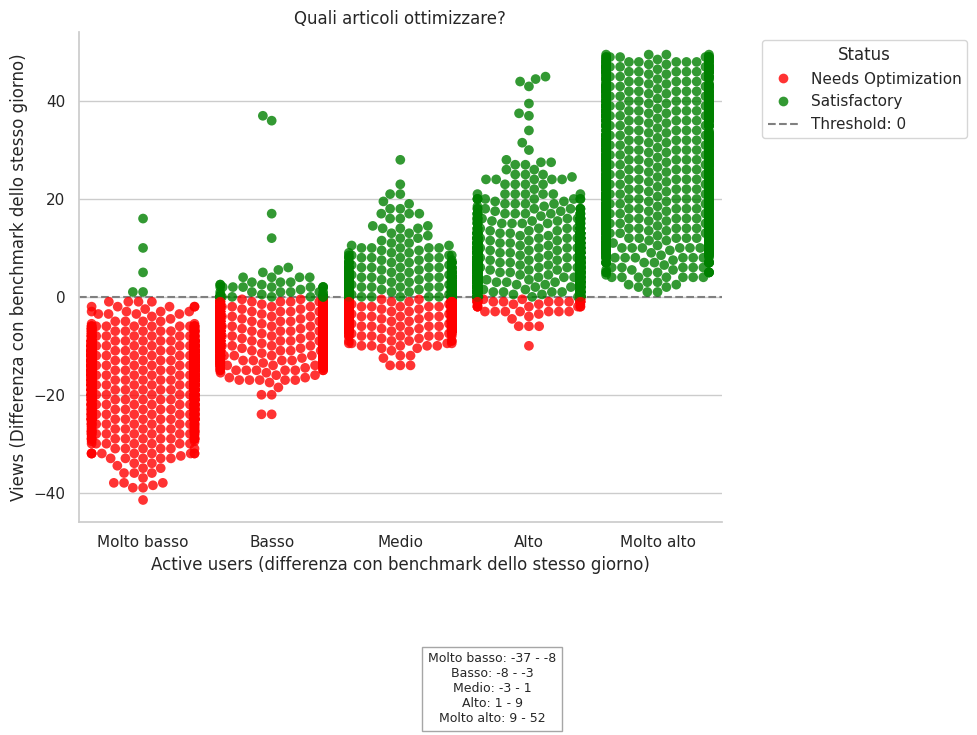

In [14]:
import pandas as pd

def calculate_daily_median_benchmark(dataframe, timestamp_column, metric_column):
    """
    Calculate the daily median benchmark for a specified business metric.

    This function computes the median value of a given metric for each day.
    The daily median is often preferred over the mean because it is robust 
    against outliers and better reflects the central tendency in skewed distributions,
    which are common in user behavior and content performance data.

    :param dataframe: The input pandas DataFrame containing the timestamp and metric columns.
    :type dataframe: pd.DataFrame
    :param timestamp_column: The name of the datetime column representing event or publication time.
    :type timestamp_column: str
    :param metric_column: The name of the metric column for which the daily median should be calculated.
    :type metric_column: str

    :return: A DataFrame with two columns: 'date' and 'daily_median_benchmark'.
             - 'date' represents the calendar date.
             - 'daily_median_benchmark' holds the median value of the metric for each day.
    :rtype: pd.DataFrame
    """
    # Create a copy to preserve the original dataset
    df_copy = dataframe.copy()

    # Convert the timestamp column to datetime to ensure consistent behavior
    df_copy[timestamp_column] = pd.to_datetime(df_copy[timestamp_column])

    # Extract the date component for daily aggregation
    df_copy['date'] = df_copy[timestamp_column].dt.date

    # Compute the daily median for the selected metric
    daily_median = (
        df_copy.groupby('date')[metric_column]
        .median()
        .reset_index()
        .rename(columns={metric_column: 'daily_median_benchmark'})
    )

    return daily_median

import pandas as pd

def add_benchmark_differences(df, pubdate_col, target_x, target_y):
    """
    Computes the difference from the daily median benchmark for each article.

    Parameters:
    - df: pandas DataFrame containing the data.
    - pubdate_col: string, name of the datetime column representing publication date.
    - target_x: string, name of the column for the X-axis metric (e.g., 'active users').
    - target_y: string, name of the column for the Y-axis metric (e.g., 'average engagement time').

    Returns:
    - DataFrame with additional columns 'diff_x' and 'diff_y' for the difference from the daily median.
    """
    
    # Create a copy to preserve the original dataset
    df_copy = df.copy()

    # Convert pubdate to datetime if not already
    df_copy[pubdate_col] = pd.to_datetime(df_copy[pubdate_col])
    
    # Get the daily median benchmarks for target_x and target_y
    daily_medians_x = calculate_daily_median_benchmark(df_copy, pubdate_col, target_x)
    daily_medians_y = calculate_daily_median_benchmark(df_copy, pubdate_col, target_y)
    
    # Merge the daily medians with the original dataframe based on the publication date
    df_copy = pd.merge(df_copy, daily_medians_x, left_on=df_copy[pubdate_col].dt.date, right_on='date', how='left')
    df_copy = pd.merge(df_copy, daily_medians_y, left_on=df_copy[pubdate_col].dt.date, right_on='date', how='left', suffixes=(f'_{target_x}', f'_{target_y}'))
    
    # Compute the differences from the median
    df_copy[f'diff_with_daily_benchmark_{target_x}'] = df_copy[target_x] - df_copy[f'daily_median_benchmark_{target_x}']
    df_copy[f'diff_with_daily_benchmark_{target_y}'] = df_copy[target_y] - df_copy[f'daily_median_benchmark_{target_y}']
    
    return df_copy


df_with_benchmark_differences = add_benchmark_differences(analysis_df, pubdate_col="pubdate", target_x="active users", target_y="views")


# Use swarmplot with these metrics
plot_business_swarm(
    df_with_benchmark_differences,
    x_col="diff_with_daily_benchmark_active users",
    y_col="diff_with_daily_benchmark_views",
    n_buckets=5,
    threshold=0,
    bucket_labels=["Molto basso", "Basso", "Medio", "Alto", "Molto alto"],
    title="Quali articoli ottimizzare?",
    xlabel="Active users (differenza con benchmark dello stesso giorno)",
    ylabel="Views (Differenza con benchmark dello stesso giorno)"
)



c:\Users\manuel.deluzi\OneDrive - Havas\Projects\personali\taxi_drivers\.td_ds_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\manuel.deluzi\OneDrive - Havas\Projects\personali\taxi_drivers\.td_ds_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\manuel.deluzi\OneDrive - Havas\Projects\personali\taxi_drivers\.td_ds_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\manuel.deluzi\OneDrive - Havas\Projects\personali\taxi_drivers\.td_ds_venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.4% o

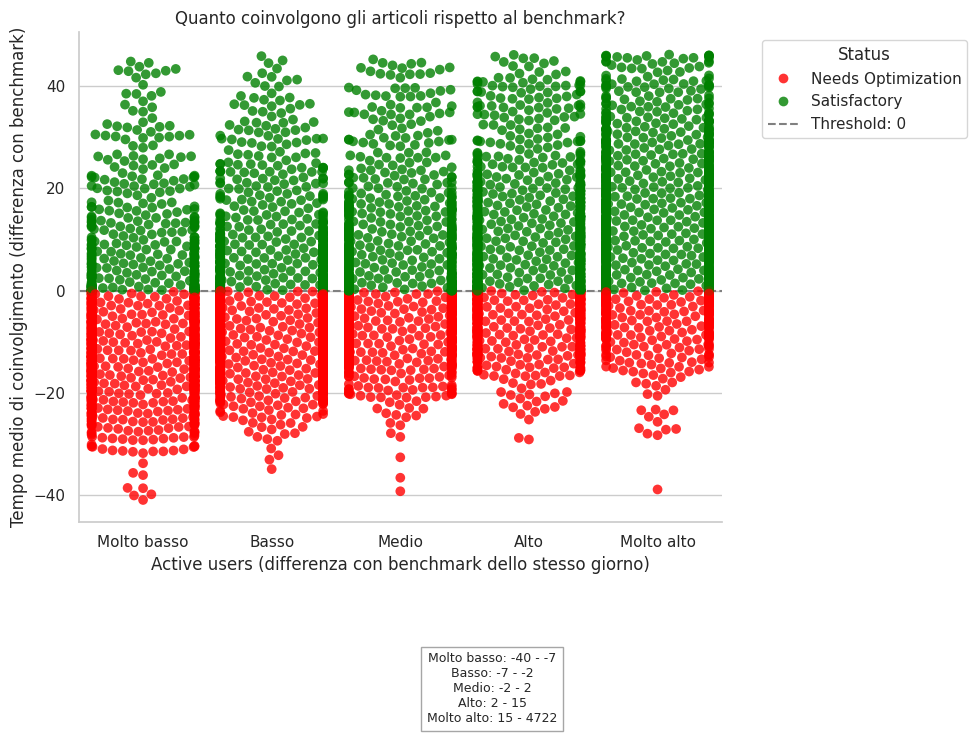

In [15]:
# Calculate daily medians and differences for engagement analysis
df_with_engagement_differences = add_benchmark_differences(
    df=analysis_df,
    pubdate_col="pubdate",
    target_x="active users",
    target_y="average engagement time per active user"
)

# Generate swarmplot: Engagement deviation vs User deviation
plot_business_swarm(
    df_with_engagement_differences,
    x_col="diff_with_daily_benchmark_active users",
    y_col="diff_with_daily_benchmark_average engagement time per active user",
    n_buckets=5,
    threshold=0,
    bucket_labels=["Molto basso", "Basso", "Medio", "Alto", "Molto alto"],
    title="Quanto coinvolgono gli articoli rispetto al benchmark?",
    xlabel="Active users (differenza con benchmark dello stesso giorno)",
    ylabel="Tempo medio di coinvolgimento (differenza con benchmark)"
)


In [16]:
# df_with_engagement_differences["pubdate"].dt.month_name().value_counts().sum()

C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_20108\1578986784.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clusters = df_with_engagement_differences.groupby(['active_users_bucket', 'engagement_bucket']).size().reset_index(name='count')


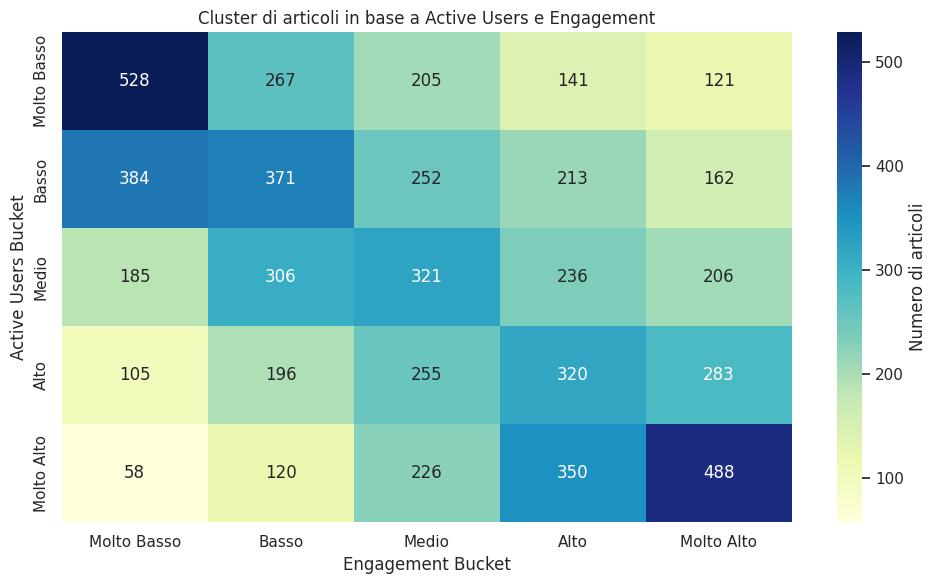

In [17]:
# Define 5 bucket labels

bucket_labels = ["Molto Basso", "Basso", "Medio", "Alto", "Molto Alto"]

# Take the difference with the daily benchmark dataframe, and assign active users to buckets

df_with_engagement_differences['active_users_bucket'] = pd.qcut(
    df_with_engagement_differences['diff_with_daily_benchmark_active users'],
    q=5,
    labels=bucket_labels
)

# Do the same for the average engagement time
df_with_engagement_differences['engagement_bucket'] = pd.qcut(
    df_with_engagement_differences['diff_with_daily_benchmark_average engagement time per active user'],
    q=5,
    labels=bucket_labels
)

# Identify clusters of all possibile combinations of active users and engagement buckets
clusters = df_with_engagement_differences.groupby(['active_users_bucket', 'engagement_bucket']).size().reset_index(name='count')

# Create a pivot table for better visualization
pivot_table = clusters.pivot(index='active_users_bucket', columns='engagement_bucket', values='count').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Numero di articoli'}
)

plt.title("Cluster di articoli in base a Active Users e Engagement")

plt.xlabel("Engagement Bucket")
plt.ylabel("Active Users Bucket")

plt.tight_layout()

plt.show()


In [ ]:
# Estrai il cluster con engagement bucket uguale a "Molto Basso" o "Basso" e Active Users Bucket uguale a "Basso" o "Molto Basso"
is_low_traffic_and_engagement = (df_with_engagement_differences["active_users_bucket"].isin(["Molto Basso", "Basso"]) & df_with_engagement_differences["engagement_bucket"].isin(["Basso", "Molto Basso"]))

low_traffic_and_engagement_df = df_with_engagement_differences[is_low_traffic_and_engagement]

# Keep articles from last month

ultimo_mese = datetime.now() - timedelta(days=30)

recent_low_traffic_and_engagement_df = low_traffic_and_engagement_df[low_traffic_and_engagement_df["pubdate"].dt.tz_localize(None) >= ultimo_mese]

#UnicodeEncodeError: 'latin-1' codec can't encode character '\u201c' in position 12: ordinal not in range(256)
#Remove that character from the all text columns
recent_low_traffic_and_engagement_df = recent_low_traffic_and_engagement_df.applymap(lambda x: x.encode('latin-1', 'replace').decode('latin-1') if isinstance(x, str) else x)


recent_low_traffic_and_engagement_df.nsmallest(20, "diff_with_daily_benchmark_active users").to_csv("recent_flop_20_low_traffic_and_engagement.csv", index=False, encoding="latin-1")

C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_20108\1673991210.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  recent_low_traffic_and_engagement_df = recent_low_traffic_and_engagement_df.applymap(lambda x: x.encode('latin-1', 'replace').decode('latin-1') if isinstance(x, str) else x)


In [19]:
# Estrai il cluster con engagement bucket uguale a "Alto" o "Molto Alto" e Active Users Bucket uguale a "Alto" o "Molto Alto"
is_high_traffic_and_engagement = (
    df_with_engagement_differences["active_users_bucket"].isin(["Alto", "Molto Alto"]) &
    df_with_engagement_differences["engagement_bucket"].isin(["Alto", "Molto Alto"])
)

high_traffic_and_engagement_df = df_with_engagement_differences[is_high_traffic_and_engagement]

# Filtra articoli pubblicati nell'ultimo mese
ultimo_mese = datetime.now() - timedelta(days=30)
recent_high_traffic_and_engagement_df = high_traffic_and_engagement_df[
    high_traffic_and_engagement_df["pubdate"].dt.tz_localize(None) >= ultimo_mese
]

# Rimuovi caratteri non codificabili in 'latin-1' da tutte le colonne di testo
recent_high_traffic_and_engagement_df = recent_high_traffic_and_engagement_df.applymap(
    lambda x: x.encode('latin-1', 'replace').decode('latin-1') if isinstance(x, str) else x
)

# Salva i dati in un file CSV
recent_high_traffic_and_engagement_df.nlargest(20, "diff_with_daily_benchmark_active users").to_csv(
    "recent_top_20_high_traffic_and_engagement.csv", index=False, encoding="latin-1"
)

C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_20108\1648238069.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  recent_high_traffic_and_engagement_df = recent_high_traffic_and_engagement_df.applymap(


In [20]:
# Save everything in a CSV file
df_with_engagement_differences = df_with_engagement_differences.applymap(lambda x: x.encode('latin-1', 'replace').decode('latin-1') if isinstance(x, str) else x)
df_with_engagement_differences.to_csv("df_with_engagement_differences.csv", index=False, encoding="latin-1")


# Save all rows for both dataframes
recent_low_traffic_and_engagement_df.to_csv("recent_flop_all_low_traffic_and_engagement.csv", index=False, encoding="latin-1")
recent_high_traffic_and_engagement_df.to_csv("recent_top_all_high_traffic_and_engagement.csv", index=False, encoding="latin-1")




C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_20108\634252362.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_with_engagement_differences = df_with_engagement_differences.applymap(lambda x: x.encode('latin-1', 'replace').decode('latin-1') if isinstance(x, str) else x)


In [21]:
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# Group recent articles by category and count them
recent_low_traffic_and_engagement_df['category'].value_counts()

category
News                    46
Festival di Cinema      36
Trailers                 7
Speciali e Magazine      2
Altro                    2
Rubriche                 1
Recensioni / In Sala     1
Name: count, dtype: int64

In [23]:
recent_high_traffic_and_engagement_df[["date", "title", "category", "link", "views", "active users", "average engagement time per active user", "publication_tags", "active_users_bucket", "engagement_bucket"]].nlargest(20, columns=["views"]).to_csv("recent_high_traffic_and_engagement.csv", index=False, encoding="latin-1", sep=";")
recent_low_traffic_and_engagement_df[["date", "title", "category", "link", "views", "active users", "average engagement time per active user", "publication_tags", "active_users_bucket", "engagement_bucket"]].nsmallest(20, columns=["views"]).to_csv("recent_low_traffic_and_engagement.csv", index=False, encoding="latin-1", sep=";")

PermissionError: [Errno 13] Permission denied: 'recent_high_traffic_and_engagement.csv'

### Nell'ultimo mese

I peggiori 10 articoli hanno tutti un ingaggio medio di 0 secondi, un po' sospetto.

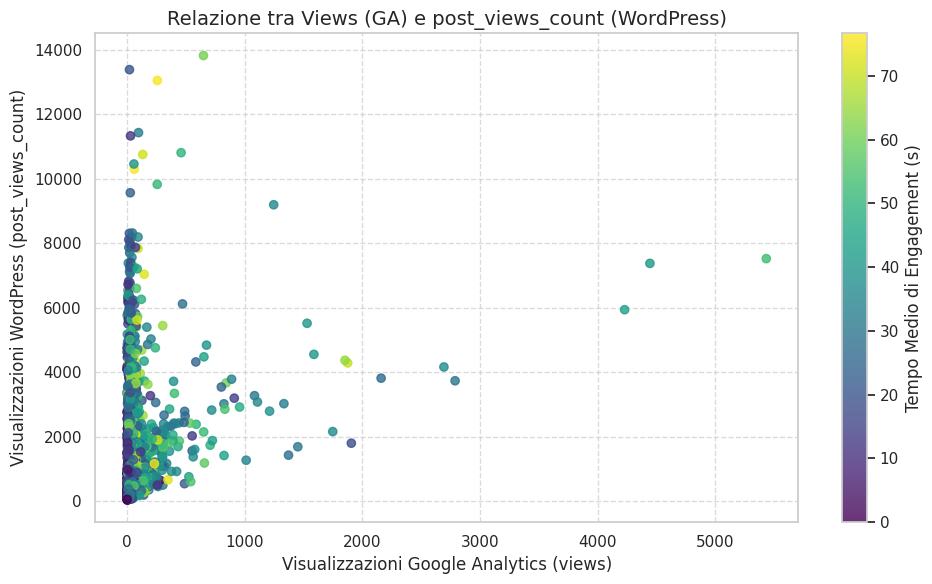

In [ ]:

q1 = analysis_df['average engagement time per active user'].quantile(0.25)
q3 = analysis_df['average engagement time per active user'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_df = analysis_df[
    (analysis_df['average engagement time per active user'] >= lower_bound) &
    (analysis_df['average engagement time per active user'] <= upper_bound)
]

# Scatterplot con linea di regressione e colore graduato
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data=filtered_df,
    x='views',
    y='post_views_count',
    c=filtered_df['average engagement time per active user'],
    cmap='viridis',  # Puoi cambiare la mappa dei colori (es. 'plasma', 'coolwarm', ecc.)
    alpha=0.8
)
plt.colorbar(scatter, label='Tempo Medio di Engagement (s)')  # Aggiunge una barra dei colori
plt.title('Relazione tra Views (GA) e post_views_count (WordPress)', fontsize=14)
plt.xlabel('Visualizzazioni Google Analytics (views)')
plt.ylabel('Visualizzazioni WordPress (post_views_count)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

🕰️ Analisi Descrittiva — Visualizzazioni per Orario di Pubblicazione